# **Financial risks in stock markets**

## In this notebook, we are going to study financial risk in stock markets by comparing the volatility of companies from different sectors. For ths we have to answer this question :

## **Which stocks are the riskiest ? Are some sectors correlated (do they move together or not), and which ones ?**




## 1. Collect :



### 1.1 Import librairies :


In [44]:
#1. IMPORTING LIBRARIES WE WILL USE LATER
#data manipulation
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns


#time
from datetime import datetime, timedelta

print("All libraries imported successfully!")
print(f"Current date: {datetime.now().strftime('%Y-%m-%d')}")

All libraries imported successfully!
Current date: 2025-12-03


### 1.2 Data Collection

In this section, we collect daily stock price data for the five selected companies representing different sectors:

| Ticker | Company               | Sector        |
|--------|------------------------|----------------|
| AAPL   | Apple Inc.             | Technology     |
| JPM    | JPMorgan Chase & Co.   | Finance        |
| AMZN   | Amazon.com Inc.        | Consumer       |
| JNJ    | Johnson & Johnson      | Healthcare     |
| TTE    | TotalEnergies SE       | Energy         |



In [49]:
#1.2. Import  the datasets
# Use os.path.join for robust path handling (handles directory names with spaces)
import os

# find the directory (it may have an empty space before the names)
data_dir = None
for item in os.listdir('.'):
    if 'Messy' in item and os.path.isdir(item):
        data_dir = item
        break

if data_dir is None:
    raise FileNotFoundError("Could not find the Messy datasets directory")

# Import datasets using the correct directory path
apple_df = pd.read_csv(os.path.join(data_dir, 'Apple_daily.csv'))
amazon_df = pd.read_csv(os.path.join(data_dir, 'Amazon_daily.csv'))
JP_Morgan_df = pd.read_csv(os.path.join(data_dir, 'JP_Morgan_daily.csv'))
Johnson_df = pd.read_csv(os.path.join(data_dir, 'Johnson&Johnson_daily.csv'))
Total_Energies_df = pd.read_csv(os.path.join(data_dir, 'TotalEnergies_daily.csv'))

print(f"Successfully loaded datasets from: {data_dir}")

Successfully loaded datasets from: Messy_datasets_new_version


In [50]:
#See the data shape since they need to have the same number of rows
print("Apple datasets rows and columns",apple_df.shape)
print("Amazon datasets rows and columns",amazon_df.shape)
print("JP_Morgan_df datasets rows and columns",JP_Morgan_df.shape)
print("Johnson_df datasets rows and columns",Johnson_df.shape)
print("Total_Energies_df datasets rows and columns",Total_Energies_df.shape)

Apple datasets rows and columns (1740, 10)
Amazon datasets rows and columns (1740, 10)
JP_Morgan_df datasets rows and columns (1745, 10)
Johnson_df datasets rows and columns (1740, 10)
Total_Energies_df datasets rows and columns (1735, 10)


## 2. Clean :


### 2.1 Assessing Data Quality :

* Check for missing values

* Check data types

*  Check for duplicates

*  Validate date ranges

*  Check for outliers

* Check data consistency



In [51]:
#Look at each data set to inspect
from IPython.display import display
print("Apple")
display(apple_df.head())
print("Amazon")
display(amazon_df.head())
print("JP_Morgan")
display(JP_Morgan_df.head())
print("Johnson")
display(Johnson_df.head())
print("Total_Energies")
display(Total_Energies_df.head())

Apple


,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,0,2019-01-02 00:00:00-05:00,38.72249984741211,39.712501525878906,38.557499,39.480000,37.538818,148158800.0,0.0,NaN
1,1,2019-01-03 00:00:00-05:00,35.994998931884766,36.43000030517578,35.500000,35.547501,33.799679,365248800.0,0.0,NaN
2,2,2019-01-04 00:00:00-05:00,36.13249969482422,37.13750076293945,35.950001,37.064999,35.242561,234428400.0,0.0,0.0
3,3,2019-01-07 00:00:00-05:00,37.17499923706055,37.20750045776367,36.474998,NaN,35.164124,219111200.0,0.0,0.0
4,4,2019-01-08 00:00:00-05:00,NaN,37.95500183105469,37.130001,37.687500,35.834446,164101200.0,0.0,0.0


Amazon


,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,0,2019-01-02 00:00:00-05:00,NaN,77.66799926757812,73.046501,76.956497,76.956497,159662000.0,0.0,0.0
1,1,2019-01-03 00:00:00-05:00,76.00050354003906,76.9000015258789,74.855499,75.014000,75.014000,139512000.0,0.0,0.0
2,2,2019-01-04 00:00:00-05:00,76.5,79.69999694824219,75.915497,78.769501,78.769501,183652000.0,0.0,0.0
3,3,2019-01-07 00:00:00-05:00,80.1155014038086,81.72799682617188,NaN,81.475502,81.475502,159864000.0,NaN,0.0
4,4,2019-01-08 00:00:00-05:00,83.2344970703125,83.83049774169922,80.830498,NaN,82.829002,177628000.0,0.0,0.0


JP_Morgan


,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,0,2019-01-02 00:00:00-05:00,95.9499969482422,99.77999877929688,95.940002,99.309998,81.616707,15670900.0,0.0,0.0
1,1,2019-01-03 00:00:00-05:00,98.63999938964844,98.88999938964844,96.690002,97.110001,80.456787,NaN,0.8,0.0
2,2,2019-01-04 00:00:00-05:00,NaN,100.93000030517578,98.279999,100.690002,83.422867,16935200.0,0.0,0.0
3,3,2019-01-07 00:00:00-05:00,100.43000030517578,101.47000122070312,NaN,100.760002,83.480865,15430700.0,0.0,0.0
4,4,2019-01-08 00:00:00-05:00,101.62999725341795,101.81999969482422,99.550003,100.570000,83.323441,13578800.0,0.0,0.0


Johnson


,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,0,2019-01-02 00:00:00-05:00,128.130005,128.3800048828125,NaN,127.750000,105.609131,7631700.0,0.0,0.0
1,1,2019-01-03 00:00:00-05:00,128.139999,128.27000427246094,NaN,125.720001,103.930962,8654500.0,NaN,0.0
2,2,2019-01-04 00:00:00-05:00,127.120003,128.64999389648438,126.730003,127.830002,105.675270,8831700.0,0.0,0.0
3,3,2019-01-07 00:00:00-05:00,127.629997,128.35000610351562,126.800003,127.010002,104.997383,8404700.0,0.0,0.0
4,4,2019-01-08 00:00:00-05:00,128.179993,130.5,127.730003,129.960007,107.436119,9351600.0,0.0,0.0


Total_Energies


,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,0,2019-01-02 00:00:00-05:00,51.810001373291016,NaN,51.610001,52.790001,34.675293,1212500.0,0.0,0.0
1,1,2019-01-03 00:00:00-05:00,52.95000076293945,53.04999923706055,52.320000,52.910000,34.754124,1099600.0,0.0,0.0
2,2,2019-01-04 00:00:00-05:00,53.68000030517578,54.459999084472656,53.560001,54.459999,35.772228,NaN,0.0,0.0
3,3,2019-01-07 00:00:00-05:00,53.77999877929688,54.54999923706055,53.549999,54.360001,35.706551,1222400.0,0.0,0.0
4,4,2019-01-08 00:00:00-05:00,54.27999877929688,54.43000030517578,54.009998,NaN,35.594883,2322000.0,0.0,0.0


In [52]:
#we need to remove the Unnamed because it's the index considered as column in the table
for df in [apple_df, amazon_df, JP_Morgan_df, Johnson_df, Total_Energies_df]:
    df.drop(columns=[col for col in df.columns if "Unnamed" in col], inplace=True, errors="ignore")
    df.index.name = None   # remove index name if it exists
apple_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2019-01-02 00:00:00-05:00,38.72249984741211,39.712501525878906,38.557499,39.480000,37.538818,148158800.0,0.0,NaN
1,2019-01-03 00:00:00-05:00,35.994998931884766,36.43000030517578,35.500000,35.547501,33.799679,365248800.0,0.0,NaN
2,2019-01-04 00:00:00-05:00,36.13249969482422,37.13750076293945,35.950001,37.064999,35.242561,234428400.0,0.0,0.0
3,2019-01-07 00:00:00-05:00,37.17499923706055,37.20750045776367,36.474998,NaN,35.164124,219111200.0,0.0,0.0
4,2019-01-08 00:00:00-05:00,NaN,37.95500183105469,37.130001,37.687500,35.834446,164101200.0,0.0,0.0


In [53]:
#have a quick look at the summary statistics
print("Apple")
display(apple_df.describe(include='all'))
print("Amazon")
display(amazon_df.describe(include='all'))
print("JP_Morgan")
display(JP_Morgan_df.describe(include='all'))
print("Johnson")
display(Johnson_df.describe(include='all'))
print("Total_Energies")
display(Total_Energies_df.describe(include='all'))

Apple


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,1740,1621,1715,1695.000000,1654.000000,1698.000000,1.703000e+03,1596.000000,1625.000000
unique,1735,1541,1643,NaN,NaN,NaN,NaN,NaN,NaN
top,2019-01-03 00:00:00-05:00,142.6999969482422,131.25999450683594,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,3,3,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,146.606967,148.453876,146.866574,8.787799e+07,0.003805,0.002462
std,NaN,NaN,NaN,58.633556,59.186657,59.670528,5.386798e+07,0.029172,0.099228
min,NaN,NaN,NaN,35.500000,35.547501,30.291780,-1.740481e+08,0.000000,0.000000
25%,NaN,NaN,NaN,112.962498,115.017502,112.154127,5.362760e+07,0.000000,0.000000
50%,NaN,NaN,NaN,149.360001,151.284996,149.002686,7.586440e+07,0.000000,0.000000
75%,NaN,NaN,NaN,187.474998,189.697498,188.187782,1.074970e+08,0.000000,0.000000


Amazon


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,1740,1731,1690,1581.000000,1577.000000,1710.000000,1.692000e+03,1630.0,1637.000000
unique,1735,1650,1636,NaN,NaN,NaN,NaN,NaN,NaN
top,2020-06-16 00:00:00-04:00,167.5500030517578,166.89999389648438,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,3,3,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,145.554984,147.982160,147.543898,6.529149e+07,0.0,0.012217
std,NaN,NaN,NaN,43.220491,43.851818,43.461060,3.654282e+07,0.0,0.494317
min,NaN,NaN,NaN,73.046501,75.014000,75.014000,-3.113460e+08,0.0,0.000000
25%,NaN,NaN,NaN,101.599998,105.372002,104.424627,4.367008e+07,0.0,0.000000
50%,NaN,NaN,NaN,151.029999,153.786499,153.360001,5.848645e+07,0.0,0.000000
75%,NaN,NaN,NaN,174.259995,176.257507,176.228626,7.962130e+07,0.0,0.000000


JP_Morgan


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,1745,1604,1737,1582.000000,1636.000000,1719.000000,1.629000e+03,1622.000000,1624.0
unique,1735,1490,1624,NaN,NaN,NaN,NaN,NaN,NaN
top,2025-11-03 00:00:00-05:00,142.94000244140625,118.61000061035156,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,4,3,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,157.278629,159.404626,148.846937,1.214560e+07,0.017201,0.0
std,NaN,NaN,NaN,55.548462,56.773825,60.880834,6.963025e+06,0.134341,0.0
min,NaN,NaN,NaN,76.910004,79.029999,67.407692,-4.359570e+07,0.000000,0.0
25%,NaN,NaN,NaN,115.332500,116.325001,105.232346,8.327000e+06,0.000000,0.0
50%,NaN,NaN,NaN,140.729996,142.560005,133.163330,1.049070e+07,0.000000,0.0
75%,NaN,NaN,NaN,179.537495,184.087505,177.872009,1.420880e+07,0.000000,0.0


Johnson


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,1740,1662.000000,1653,1642.000000,1739.000000,1685.000000,1.688000e+03,1615.000000,1631.0
unique,1735,NaN,1391,NaN,NaN,NaN,NaN,NaN,NaN
top,2025-06-23 00:00:00-04:00,NaN,164.38999938964844,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,156.956276,NaN,155.773149,157.144959,142.820882,7.935034e+06,0.015554,0.0
std,NaN,14.361019,NaN,14.439609,14.631667,18.687577,6.955988e+06,0.130249,0.0
min,NaN,117.000000,NaN,109.160004,111.139999,23.964251,-1.441750e+07,0.000000,0.0
25%,NaN,147.404995,NaN,146.062500,147.205002,128.345688,5.689475e+06,0.000000,0.0
50%,NaN,158.214996,NaN,156.784996,158.320007,146.858017,6.899850e+06,0.000000,0.0
75%,NaN,166.000000,NaN,164.822502,166.184998,153.897949,8.623650e+06,0.000000,0.0


Total_Energies


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,1735,1649,1598,1722.000000,1638.000000,1662.000000,1.563000e+03,1642.000000,1729.0
unique,1735,1292,1303,NaN,NaN,NaN,NaN,NaN,NaN
top,2019-01-02 00:00:00-05:00,61.630001068115234,57.93999862670898,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,4,5,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,54.213078,54.853316,45.334847,1.933867e+06,0.013096,0.0
std,NaN,NaN,NaN,9.589139,10.482233,12.379737,1.226913e+06,0.101968,0.0
min,NaN,NaN,NaN,22.129999,24.760000,17.157011,-4.659500e+06,0.000000,0.0
25%,NaN,NaN,NaN,48.259998,48.730000,35.487028,1.220950e+06,0.000000,0.0
50%,NaN,NaN,NaN,55.004999,55.545000,42.105955,1.662600e+06,0.000000,0.0
75%,NaN,NaN,NaN,61.474999,61.937499,57.527821,2.389650e+06,0.000000,0.0


In [54]:
#all columns types need to be floats except the data one, which needs to be formated as data type
print("________Apple______")
display(apple_df.info())
print("_______Amazon_______")
display(amazon_df.info())
print("________JP_Morgan________")
display(JP_Morgan_df.info())
print("_________Johnson_________")
display(Johnson_df.info())
print("_________Total_Energies_________")
display(Total_Energies_df.info())

________Apple______
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1740 entries, 0 to 1739
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1740 non-null   object 
 1   Open          1621 non-null   object 
 2   High          1715 non-null   object 
 3   Low           1695 non-null   float64
 4   Close         1654 non-null   float64
 5   Adj Close     1698 non-null   float64
 6   Volume        1703 non-null   float64
 7   Dividends     1596 non-null   float64
 8   Stock Splits  1625 non-null   float64
dtypes: float64(6), object(3)
memory usage: 122.5+ KB


None

_______Amazon_______
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1740 entries, 0 to 1739
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1740 non-null   object 
 1   Open          1731 non-null   object 
 2   High          1690 non-null   object 
 3   Low           1581 non-null   float64
 4   Close         1577 non-null   float64
 5   Adj Close     1710 non-null   float64
 6   Volume        1692 non-null   float64
 7   Dividends     1630 non-null   float64
 8   Stock Splits  1637 non-null   float64
dtypes: float64(6), object(3)
memory usage: 122.5+ KB


None

________JP_Morgan________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1745 entries, 0 to 1744
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1745 non-null   object 
 1   Open          1604 non-null   object 
 2   High          1737 non-null   object 
 3   Low           1582 non-null   float64
 4   Close         1636 non-null   float64
 5   Adj Close     1719 non-null   float64
 6   Volume        1629 non-null   float64
 7   Dividends     1622 non-null   float64
 8   Stock Splits  1624 non-null   float64
dtypes: float64(6), object(3)
memory usage: 122.8+ KB


None

_________Johnson_________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1740 entries, 0 to 1739
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1740 non-null   object 
 1   Open          1662 non-null   float64
 2   High          1653 non-null   object 
 3   Low           1642 non-null   float64
 4   Close         1739 non-null   float64
 5   Adj Close     1685 non-null   float64
 6   Volume        1688 non-null   float64
 7   Dividends     1615 non-null   float64
 8   Stock Splits  1631 non-null   float64
dtypes: float64(7), object(2)
memory usage: 122.5+ KB


None

_________Total_Energies_________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1735 entries, 0 to 1734
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1735 non-null   object 
 1   Open          1649 non-null   object 
 2   High          1598 non-null   object 
 3   Low           1722 non-null   float64
 4   Close         1638 non-null   float64
 5   Adj Close     1662 non-null   float64
 6   Volume        1563 non-null   float64
 7   Dividends     1642 non-null   float64
 8   Stock Splits  1729 non-null   float64
dtypes: float64(6), object(3)
memory usage: 122.1+ KB


None

Since there are some negative values for volumes, nan values, big  differences between Adjusted close and Close price, not all columns types are floats etc..., we need to process to cleanig the data.

Since our dataset,we need to have for each unique day ( like a Date ID), one row, we need to see if there are duplicates :

In [55]:
#check if there are duplicates by seeing if there are two rows for the same day
print(apple_df['Date'].duplicated().sum())
print(amazon_df['Date'].duplicated().sum())
print(JP_Morgan_df['Date'].duplicated().sum())
print(Johnson_df['Date'].duplicated().sum())
print(Total_Energies_df['Date'].duplicated().sum())

5
5
10
5
0


> Since it's the same reasoning for the  5 datasets, we'll define functions that perform the same operations for the cleaning



In [56]:
datasets = {
    "Apple": apple_df,
    "Amazon": amazon_df,
    "JP Morgan": JP_Morgan_df,
    "Johnson&Johnson": Johnson_df,
    "Total Energies": Total_Energies_df,
}

In [58]:
# function that drops duplicates
#First Change data column type to data format
def change_to_date(df):
    df['Date'] = pd.to_datetime(df['Date'],errors="coerce",utc=True)

    print("Column Date converted to date format and sorted by date ")
    return df

#Convert other columns to float, if it's error, make it NaN  :
def convert_to_float(df):
    for col in df.columns:
        if col != 'Date':
            df[col] = pd.to_numeric(df[col], errors='coerce')

    return df


In [59]:
#drop duplicates by looking at the date that acts like key
def remove_duplicates(df,name):
    dup_count = df['Date'].duplicated().sum()
    if dup_count > 0:
        df = df.drop_duplicates()
        print(f"{name}: duplicates removed")
    return df

### 2.2 Handling Missing Values :

In [60]:
#First of all, since we have negative values which can't be possible
#So we assume that it's just an input error and it's just postive value instead

def handle_negative_values(df):
   numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
   for col in numeric_cols:
       df[col] = df[col].abs()
   return df



> Here, it's preferable to not drop any empty missing entry since we are going to compare the companies by periods the NaN values placements are random

So here is what we decided to do:

*   First rows : replace by the following value
*   Middle rows : do the average between previous and following values
*   Last rows : replace by the previous value

If the following or previous value is empty, take the closest real value. 

In [61]:
import pandas as pd
import numpy as np

def fill_missing_prices_by_neighbors(df):

    price_cols = [c for c in ['Close', 'Adj Close'] if c in df.columns]

    for col in price_cols:
        n = len(df)

        #first row case
        if pd.isna(df[col].iloc[0]):
          #if the first cell if NaN it takes the next cell if it's not NAN, otherwise the next one
            if pd.notna(df[col].iloc[1]):
                df[col].iloc[0] = df[col].iloc[1]
            elif pd.notna(df[col].iloc[2]):
                df[col].iloc[0] = df[col].iloc[2]

        #starting from second row to before last row
        for i in range(1, n - 1):
          #takes the average between it pre
            if pd.isna(df[col].iloc[i]):
                prev_val = df[col].iloc[i - 1]
                next_val = df[col].iloc[i + 1]

                if pd.notna(prev_val) and pd.notna(next_val):
                    df[col].iloc[i] = (prev_val + next_val) / 2

                elif pd.notna(prev_val):
                    df[col].iloc[i] = prev_val #takes only the previous one if there the next row is empty

                elif pd.notna(next_val):
                    df[col].iloc[i] = next_val #takes only the new one if there the previous row is empty

        #last row case
        if pd.isna(df[col].iloc[n - 1]):
            if pd.notna(df[col].iloc[n - 2]):
                df[col].iloc[n - 1] = df[col].iloc[n - 2]
            elif pd.notna(df[col].iloc[n - 3]):
                df[col].iloc[n - 1] = df[col].iloc[n - 3]

    return df



In [62]:
#for the volume, we replace it by the median
def fill_missing_volume(df):
  if 'Volume' in df.columns:
    median_vol = df['Volume'].median()
    df['Volume'] = df['Volume'].fillna(median_vol)
  return df

### 2.3 Transforming the features :

In [63]:
# Since Dividends and Stock Splits columns are always 0, drop them
def drop_dividends_and_stock_splits(df):
    df = df.drop(columns=['Dividends', 'Stock Splits'])
    return df

In [64]:
#see if there are outliers between close price and ajusted price (the difference should not be huge )
def difference_close_adjusted(df,threshhold=2):
  for i in range (len(df)):
    close_val = df['Close'].iloc[i]
    adj_val = df['Adj Close'].iloc[i]   # or 'Adj Close' if this is your column
    diff = abs(close_val - adj_val)
    if diff>threshhold:
      df.loc[i, adj_val] = close_val
    return df


In [65]:
#Add Year Month Day column

def add_year_month_day(df):
  df['Year'] = df['Date'].dt.year
  df['Month'] = df['Date'].dt.month
  df['Day'] = df['Date'].dt.day
  return df


### 2.4 Apply these transformations to the dataset once  :

In [66]:
def full_clean_df(df, name):


    #2-remove duplicates
    df=change_to_date(df)
    df=convert_to_float(df)
    df = remove_duplicates(df, name)

    #2- Handle missing values
    df = handle_negative_values(df)
    df = fill_missing_prices_by_neighbors(df)
    df = fill_missing_volume(df)

    #3-Transform
    df = drop_dividends_and_stock_splits(df)
    df= difference_close_adjusted(df,threshhold=2) # Handling outliers
    df= add_year_month_day(df)
    return df

# Original code from the cell
cleaned_datasets = {}

for name, df in datasets.items():
    cleaned_datasets[name] = full_clean_df(df.copy(), name)


Column Date converted to date format and sorted by date 
Apple: duplicates removed
Column Date converted to date format and sorted by date 
Amazon: duplicates removed
Column Date converted to date format and sorted by date 
JP Morgan: duplicates removed


C:\Users\apoll\AppData\Local\Temp\ipykernel_55716\3009737071.py:27: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[col].iloc[i] = (prev_val + next_val) / 2
C:\Users\apoll\AppData\Local\Temp\ipykernel_55716\3009737071.py:27: SettingWithCopy

Column Date converted to date format and sorted by date 
Johnson&Johnson: duplicates removed
Column Date converted to date format and sorted by date 


C:\Users\apoll\AppData\Local\Temp\ipykernel_55716\3009737071.py:27: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[col].iloc[i] = (prev_val + next_val) / 2
C:\Users\apoll\AppData\Local\Temp\ipykernel_55716\3009737071.py:27: SettingWithCopy

## 3. Store :

In this section, we store the cleaned data in a structured format for easy access and analysis.

### 3.1 Save Cleaned Data to CSV Files


In [67]:
# cleaned_data
import os

cleaned_data_dir = "Cleaned_datasets"
if not os.path.exists(cleaned_data_dir):
    os.makedirs(cleaned_data_dir)
    print(f"Created directory: {cleaned_data_dir}")
else:
    print(f"Directory already exists: {cleaned_data_dir}")

# Save each cleaned dataset to CSV
for name, df in cleaned_datasets.items():
    # sort by date
    df_sorted = df.sort_values('Date').copy()
    
    # filename
    filename = f"{cleaned_data_dir}/{name.replace(' ', '_').replace('&', '_')}_cleaned.csv"
    
    #csv saving
    df_sorted.to_csv(filename, index=False)
    print(f"Saved {name} cleaned data: {filename} ({len(df_sorted)} rows)")

print(f"\nAll cleaned datasets saved to '{cleaned_data_dir}/' directory")


Directory already exists: Cleaned_datasets
Saved Apple cleaned data: Cleaned_datasets/Apple_cleaned.csv (1735 rows)
Saved Amazon cleaned data: Cleaned_datasets/Amazon_cleaned.csv (1735 rows)
Saved JP Morgan cleaned data: Cleaned_datasets/JP_Morgan_cleaned.csv (1735 rows)
Saved Johnson&Johnson cleaned data: Cleaned_datasets/Johnson_Johnson_cleaned.csv (1735 rows)
Saved Total Energies cleaned data: Cleaned_datasets/Total_Energies_cleaned.csv (1735 rows)

All cleaned datasets saved to 'Cleaned_datasets/' directory


### 3.2 Create Unified Dataset for Analysis


In [70]:
# create a unified dataset with all companies 
# we will merge on date to have all stocks aligned by trading day

# ensure datasets are sorted by date
for name in cleaned_datasets.keys():
    cleaned_datasets[name] = cleaned_datasets[name].sort_values('Date').reset_index(drop=True)

# mapping names to sectors
company_sectors = {
    "Apple": "Technology",
    "Amazon": "Consumer",
    "JP Morgan": "Finance",
    "Johnson&Johnson": "Healthcare",
    "Total Energies": "Energy"
}

# dataset with close prices and volumes
unified_data = None

for name, df in cleaned_datasets.items():
    # Select key columns
    df_subset = df[['Date', 'Close', 'Volume']].copy()
    df_subset.columns = ['Date', f'{name}_Close', f'{name}_Volume']
    
    if unified_data is None:
        unified_data = df_subset
    else:
        unified_data = pd.merge(unified_data, df_subset, on='Date', how='outer')

# Sort by date
unified_data = unified_data.sort_values('Date').reset_index(drop=True)

# Save unified dataset
unified_filename = f"{cleaned_data_dir}/unified_stock_data.csv"
unified_data.to_csv(unified_filename, index=False)

print(f"Unified dataset created: {unified_filename}")
print(f"Shape: {unified_data.shape}")
print(f"Date range: {unified_data['Date'].min()} to {unified_data['Date'].max()}")
print(f"\nPreview:")
display(unified_data.head())


Unified dataset created: Cleaned_datasets/unified_stock_data.csv
Shape: (1735, 11)
Date range: 2019-01-02 05:00:00+00:00 to 2025-11-24 05:00:00+00:00

Preview:


,Date,Apple_Close,Apple_Volume,Amazon_Close,Amazon_Volume,JP Morgan_Close,JP Morgan_Volume,Johnson&Johnson_Close,Johnson&Johnson_Volume,Total Energies_Close,Total Energies_Volume
0,2019-01-02 05:00:00+00:00,39.480000,148158800.0,76.956497,159662000.0,99.309998,15670900.0,127.750000,7631700.0,52.790001,1212500.0
1,2019-01-03 05:00:00+00:00,35.547501,365248800.0,75.014000,139512000.0,97.110001,10580350.0,125.720001,8654500.0,52.910000,1099600.0
2,2019-01-04 05:00:00+00:00,37.064999,234428400.0,78.769501,183652000.0,100.690002,16935200.0,127.830002,8831700.0,54.459999,1675000.0
3,2019-01-07 05:00:00+00:00,37.376249,219111200.0,81.475502,159864000.0,100.760002,15430700.0,127.010002,8404700.0,54.360001,1222400.0
4,2019-01-08 05:00:00+00:00,37.687500,164101200.0,82.223251,177628000.0,100.570000,13578800.0,129.960007,9351600.0,54.870001,2322000.0


### 3.3 Store Summary Statistics


In [71]:
#summart statistics
summary_stats = []

for name, df in cleaned_datasets.items():
    stats = {
        'Company': name,
        'Sector': company_sectors.get(name, 'Unknown'),
        'Total_Days': len(df),
        'Date_Start': df['Date'].min(),
        'Date_End': df['Date'].max(),
        'Mean_Close': df['Close'].mean(),
        'Std_Close': df['Close'].std(),
        'Min_Close': df['Close'].min(),
        'Max_Close': df['Close'].max(),
        'Mean_Volume': df['Volume'].mean()
    }
    summary_stats.append(stats)

summary_df = pd.DataFrame(summary_stats)
summary_filename = f"{cleaned_data_dir}/summary_statistics.csv"
summary_df.to_csv(summary_filename, index=False)

print(f"Summary statistics saved: {summary_filename}")
display(summary_df)


Summary statistics saved: Cleaned_datasets/summary_statistics.csv


,Company,Sector,Total_Days,Date_Start,Date_End,Mean_Close,Std_Close,Min_Close,Max_Close,Mean_Volume
0,Apple,Technology,1735,2019-01-02 05:00:00+00:00,2025-11-24 05:00:00+00:00,148.827479,59.292992,35.547501,275.920013,8.877271e+07
1,Amazon,Consumer,1735,2019-01-02 05:00:00+00:00,2025-11-24 05:00:00+00:00,147.616188,43.833515,75.014000,313.361464,6.663222e+07
2,JP Morgan,Finance,1735,2019-01-02 05:00:00+00:00,2025-11-24 05:00:00+00:00,159.790623,56.864138,79.029999,320.410004,1.231715e+07
3,Johnson&Johnson,Healthcare,1735,2019-01-02 05:00:00+00:00,2025-11-24 05:00:00+00:00,157.170469,14.626175,111.139999,240.958865,8.057866e+06
4,Total Energies,Energy,1735,2019-01-02 05:00:00+00:00,2025-11-24 05:00:00+00:00,54.896900,10.505847,24.760000,150.246174,1.945358e+06


## 4. Analyze :

In this section, we perform comprehensive financial risk analysis including returns, volatility, correlation, and diversification metrics.




### 4.1 - Financial Indicators :

#### Financial returns



In [73]:
#FINANCIAL RETURNS

#store returns data
returns_data = {}
for name,df in cleaned_datasets.items():
    
    df= df.sort_values('Date').copy()
    
    #daily returns 
    df['Daily_Return'] = df['Close'].pct_change()
    
    #Log returns
    df['Log_Return']= np.log(df['Close'] / df['Close'].shift(1))
    
    # store in dictionary
    returns_data[name]= df

#display results
print("\nSample returns for Apple:")
display(returns_data['Apple'][['Date', 'Close','Daily_Return','Log_Return']].head(10000))



Sample returns for Apple:


,Date,Close,Daily_Return,Log_Return
0,2019-01-02 05:00:00+00:00,39.480000,NaN,NaN
1,2019-01-03 05:00:00+00:00,35.547501,-0.099607,-0.104924
2,2019-01-04 05:00:00+00:00,37.064999,0.042689,0.041803
3,2019-01-07 05:00:00+00:00,37.376249,0.008397,0.008362
4,2019-01-08 05:00:00+00:00,37.687500,0.008327,0.008293
...,...,...,...,...
1730,2025-11-18 05:00:00+00:00,268.009995,0.002056,0.002054
1731,2025-11-19 05:00:00+00:00,268.559998,0.002052,0.002050
1732,2025-11-20 05:00:00+00:00,266.250000,-0.008601,-0.008639
1733,2025-11-21 05:00:00+00:00,271.489990,0.019681,0.019490


#### Risk measurement

In [74]:
# RISK MEASUREMENT

risk_metrics = {}

for name,df_returns in returns_data.items():
    # get log returns
    returns = df_returns['Log_Return'].dropna()
    
    # standard deviation of returns = volatility
    daily_volatility =returns.std()
    
    # annualized volatility
    annualized_volatility = daily_volatility *np.sqrt(252)
    
    #var at 95/100 and 99/100 confidence levels
    var_95 = np.percentile(returns,5)  #5th percentile => 95/100 var
    var_99= np.percentile(returns,1 )   #1st percentile =>99/100 var
    # max drawdown
    prices =df_returns['Close'].values
    # peak prices
    running_max = np.maximum.accumulate(prices)
    # drawdown calculation
    drawdown = (prices - running_max) / running_max
    max_drawdown = drawdown.min()  # most negative value =>largest drawdown
    
    # store all metrics
    risk_metrics[name] = {
        'Daily_volatility': daily_volatility,
        'Annualized_volatility': annualized_volatility,
        'VAR_95': var_95,
        'VAR_99': var_99,
        'Max_drawdown': max_drawdown,
        'Mean_return': returns.mean(),
        'Annualized_return': returns.mean() * 252
    }


# create a dataframe to display all results in a clear and readable way
risk_df =pd.DataFrame(risk_metrics).T
risk_df= risk_df.round(6)


print("RISK METRICS SUMMARY")
display(risk_df)


RISK METRICS SUMMARY


,Daily_volatility,Annualized_volatility,VAR_95,VAR_99,Max_drawdown,Mean_return,Annualized_return
Apple,0.022230,0.352883,-0.030226,-0.050145,-0.364459,0.001121,0.282565
Amazon,0.033303,0.528670,-0.032706,-0.057706,-0.674593,0.000622,0.156742
JP Morgan,0.036330,0.576725,-0.026616,-0.054874,-0.576562,0.000634,0.159704
Johnson&Johnson,0.024164,0.383595,-0.016901,-0.033997,-0.538759,0.000276,0.069473
Total Energies,0.074055,1.175594,-0.029715,-0.067609,-0.815924,0.000116,0.029138


#### Comparative Risk Analysis Between Sectors

Here, our objective was to compare risk metrics across different sectors to identify which sectors are riskier, and understand risk patterns for each sector.





RISK METRICS BY SECTOR


Annualized_volatility                 Max_drawdown          VAR_95  \
                            mean     min     max         mean     min    mean   
Sector                                                                          
Consumer                  0.5287  0.5287  0.5287      -0.6746 -0.6746 -0.0327   
Energy                    1.1756  1.1756  1.1756      -0.8159 -0.8159 -0.0297   
Finance                   0.5767  0.5767  0.5767      -0.5766 -0.5766 -0.0266   
Healthcare                0.3836  0.3836  0.3836      -0.5388 -0.5388 -0.0169   
Technology                0.3529  0.3529  0.3529      -0.3645 -0.3645 -0.0302   

                    VAR_99         Annualized_return  
               min    mean     min              mean  
Sector                                                
Consumer   -0.0327 -0.0577 -0.0577            0.1567  
Energy     -0.0297 -0.0676 -0.0676            0.0291  
Finance    -0.0266 -0.0549 -0.0549            0.1597  
Healthcare -0.0169 -0.0340 -0.0340            0.0695  
Technology -0.0302 -0.0501 -0.0501            0.2826



RISKIEST STOCKS BY VOLATILITY (Top 3)


,Sector,Annualized_volatility,Max_drawdown
Total Energies,Energy,1.175594,-0.815924
JP Morgan,Finance,0.576725,-0.576562
Amazon,Consumer,0.528670,-0.674593




STOCKS WITH LARGEST DRAWDOWNS (only 3))


,Sector,Max_drawdown,Annualized_volatility
Total Energies,Energy,-0.815924,1.175594
Amazon,Consumer,-0.674593,0.528670
JP Morgan,Finance,-0.576562,0.576725


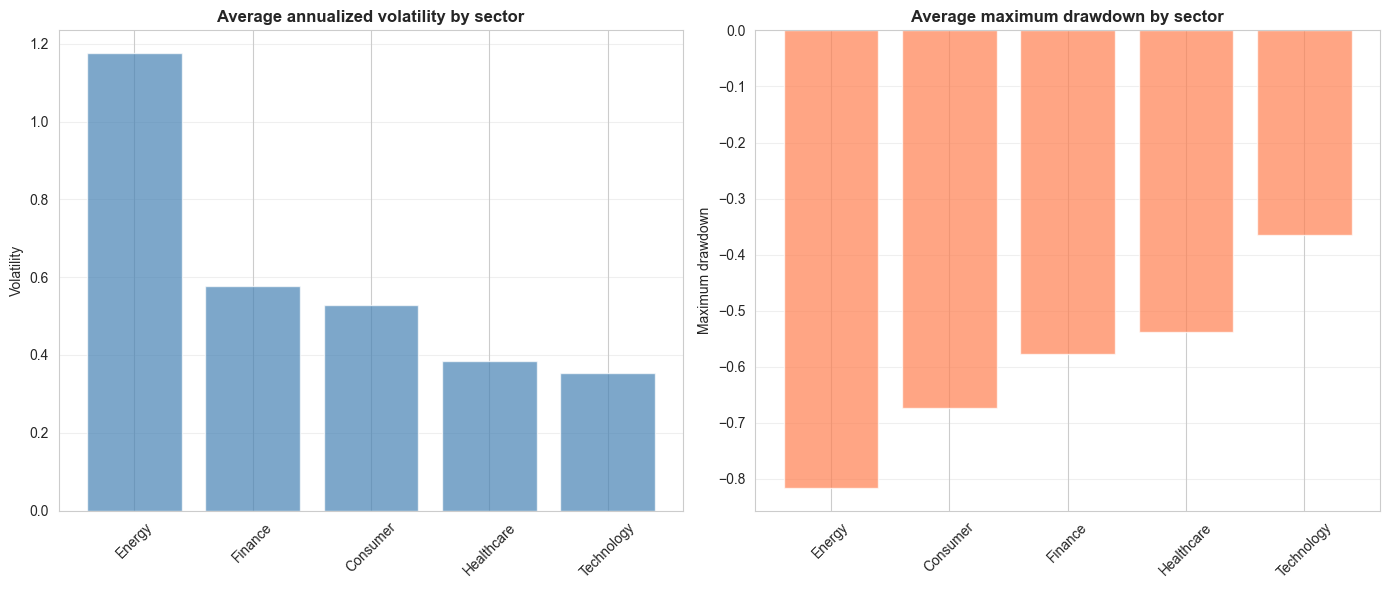

In [75]:
# COMPARATIVE RISK ANALYSIS BETWEEN SECTORS

# add sector information to risk_df 
if 'Sector' not in risk_df.columns:
    company_sectors = {
        "Apple": "Technology",
        "Amazon": "Consumer",
        "JP Morgan": "Finance",
        "Johnson&Johnson": "Healthcare",
        "Total Energies": "Energy"
    }
    risk_df['Sector'] = risk_df.index.map(company_sectors)

# group by sector and aggregate
sector_comparison = risk_df.groupby('Sector').agg({
    'Annualized_volatility':['mean', 'min', 'max'],
    'Max_drawdown': ['mean', 'min'],
    'VAR_95': ['mean','min'],
    'VAR_99':['mean','min'],
    'Annualized_return':['mean']
}).round(4)

print("\n")
print("RISK METRICS BY SECTOR")
display(sector_comparison)

# identify riskiest stocks by volatility
print("\n")
print("RISKIEST STOCKS BY VOLATILITY (Top 3)")
riskiest_volatility = risk_df.nlargest(3,'Annualized_volatility')[['Sector', 'Annualized_volatility', 'Max_drawdown']]
display(riskiest_volatility)

# identify riskiest stocks by max drawdown
print("\n")
print("STOCKS WITH LARGEST DRAWDOWNS (only 3))")
riskiest_drawdown = risk_df.nsmallest(3, 'Max_drawdown')[['Sector', 'Max_drawdown', 'Annualized_volatility']]
display(riskiest_drawdown)

# bar chart comparing sectors
fig,axes = plt.subplots(1, 2, figsize=(14, 6))

# average volatility by sector
sector_vol = risk_df.groupby('Sector')['Annualized_volatility'].mean().sort_values(ascending=False)
axes[0].bar(sector_vol.index, sector_vol.values, color='steelblue', alpha=0.7)
axes[0].set_title('Average annualized volatility by sector', fontweight='bold')
axes[0].set_ylabel('Volatility')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True,alpha=0.3, axis='y')

# average maximum drawdown by sector
sector_dd= risk_df.groupby('Sector')['Max_drawdown'].mean().sort_values(ascending=True)
axes[1].bar(sector_dd.index,sector_dd.values, color='coral', alpha=0.7)
axes[1].set_title('Average maximum drawdown by sector', fontweight='bold')
axes[1].set_ylabel('Maximum drawdown')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()



### 4.2 : Diversification

#### Correlation matrix across sectors

First, we want to study which sectors are correlated.


Sector level correlation matrix:


,Energy,Consumer,Technology,Finance,Healthcare
Energy,1.0000,0.0254,0.0881,0.0706,0.0573
Consumer,0.0254,1.0000,0.3126,0.1081,0.0550
Technology,0.0881,0.3126,1.0000,0.1717,0.0990
Finance,0.0706,0.1081,0.1717,1.0000,0.0994
Healthcare,0.0573,0.0550,0.0990,0.0994,1.0000


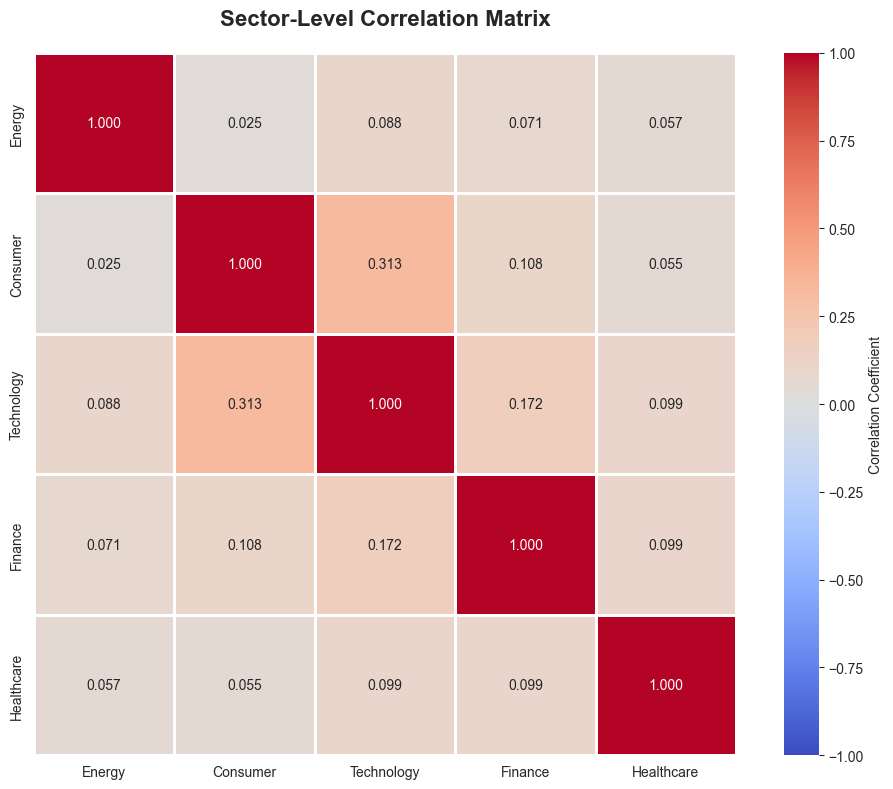

In [78]:
# cross sector correlation analysis
# prepare data with sector information
sector_returns = {}
for name, df_returns in returns_data.items():
    sector = company_sectors[name]
    sector_returns[name] = {
        'returns': df_returns.set_index('Date')['Log_Return'],
        'sector': sector
    }

# calculate average returns by sector
sector_avg_returns = {}
for sector in set(company_sectors.values()):
    # get all companies in this sector
    companies_in_sector = [name for name, s in company_sectors.items() if s == sector]
    
    # combine returns from all companies in sector
    sector_returns_list = [returns_data[name].set_index('Date')['Log_Return'] 
                           for name in companies_in_sector]
    
    # average returns across companies in sector
    sector_df = pd.concat(sector_returns_list, axis=1)
    sector_avg_returns[sector] = sector_df.mean(axis=1)

# create dataframe with sector returns
sector_returns_df = pd.DataFrame(sector_avg_returns).dropna()

# calculate sector correlation matrix
sector_correlation = sector_returns_df.corr()

print("\nSector level correlation matrix:")
display(sector_correlation.round(4))
# visualize sector correlation
plt.figure(figsize=(10, 8))
sns.heatmap(sector_correlation, annot=True, fmt='.3f', cmap='coolwarm',
            center=0, vmin=-1, vmax=1, square=True, linewidths=2,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Sector-Level Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


In [79]:
# identify sector pairs that move together or independently
print("\nSector correlation analysis:")
sector_pairs = []
sectors_list = list(sector_correlation.columns)
for i in range(len(sectors_list)):
    for j in range(i+1, len(sectors_list)):
        sector1 = sectors_list[i]
        sector2 = sectors_list[j]
        corr_value = sector_correlation.iloc[i, j]
        sector_pairs.append({
            'Sector_1': sector1,
            'Sector_2': sector2,
            'Correlation': corr_value,
            'Relationship': 'Strong Positive' if corr_value > 0.5 else 
                           'Moderate Positive' if corr_value > 0.3 else
                           'Weak Positive' if corr_value > 0 else
                           'Weak Negative' if corr_value > -0.3 else
                           'Moderate Negative' if corr_value > -0.5 else 'Strong Negative'
        })

sector_pairs_df = pd.DataFrame(sector_pairs).sort_values('Correlation', ascending=False)
display(sector_pairs_df.round(4))



Sector correlation analysis:


,Sector_1,Sector_2,Correlation,Relationship
4,Consumer,Technology,0.3126,Moderate Positive
7,Technology,Finance,0.1717,Weak Positive
5,Consumer,Finance,0.1081,Weak Positive
9,Finance,Healthcare,0.0994,Weak Positive
8,Technology,Healthcare,0.0990,Weak Positive
1,Energy,Technology,0.0881,Weak Positive
2,Energy,Finance,0.0706,Weak Positive
3,Energy,Healthcare,0.0573,Weak Positive
6,Consumer,Healthcare,0.0550,Weak Positive
0,Energy,Consumer,0.0254,Weak Positive


In [81]:
# key insights
print("\nSummary insights:")
most_correlated = sector_pairs_df.iloc[0]
least_correlated = sector_pairs_df.iloc[-1]
print(f"- Most correlated sectors: {most_correlated['Sector_1']} & {most_correlated['Sector_2']} (r = {most_correlated['Correlation']:.4f})")
print(f"- Least correlated sectors: {least_correlated['Sector_1']} & {least_correlated['Sector_2']} (r = {least_correlated['Correlation']:.4f})")
print(f"- Average sector correlation: {sector_correlation.values[np.triu_indices_from(sector_correlation.values, k=1)].mean():.4f}")


Summary insights:
- Most correlated sectors: Consumer & Technology (r = 0.3126)
- Least correlated sectors: Energy & Consumer (r = 0.0254)
- Average sector correlation: 0.1087


#### Correlation matrix between companies

Now that we have a clearer idea of what the correlation between sectors look like, we can take a closer look at the correlation between specific stocks.


CORRELATION MATRIX OF STOCK RETURNS


,Apple,Amazon,JP Morgan,Johnson&Johnson,Total Energies
Apple,1.0000,0.3126,0.1717,0.0990,0.0881
Amazon,0.3126,1.0000,0.1081,0.0550,0.0254
JP Morgan,0.1717,0.1081,1.0000,0.0994,0.0706
Johnson&Johnson,0.0990,0.0550,0.0994,1.0000,0.0573
Total Energies,0.0881,0.0254,0.0706,0.0573,1.0000


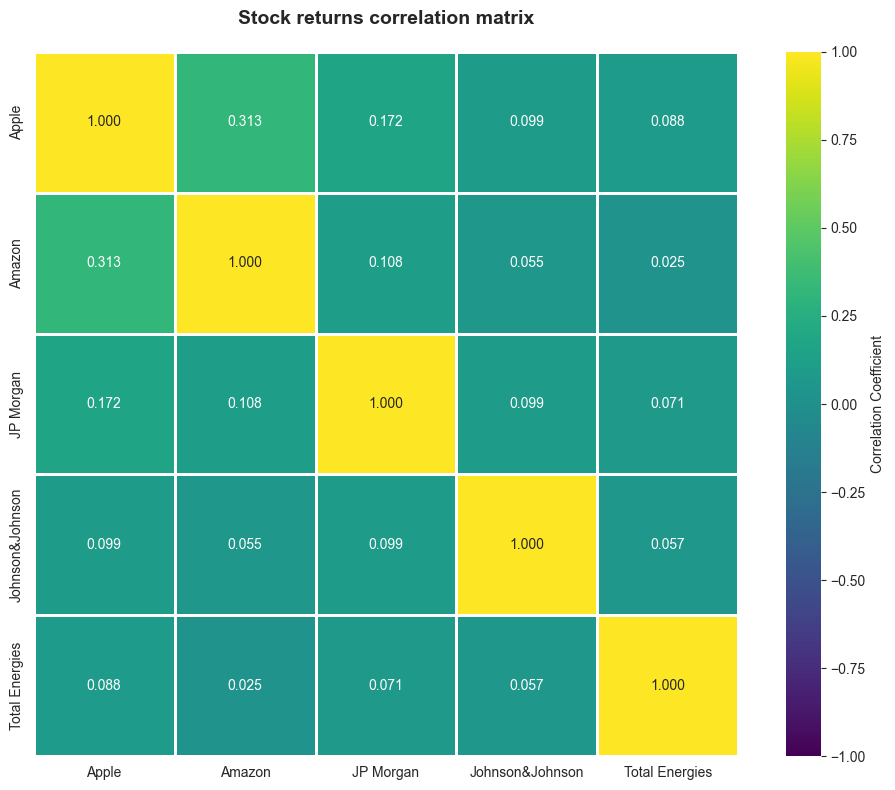



STRONGEST CORRELATIONS


,Stock_1,Stock_2,Correlation
0,Apple,Amazon,0.3126
1,Apple,JP Morgan,0.1717
4,Amazon,JP Morgan,0.1081
7,JP Morgan,Johnson&Johnson,0.0994
2,Apple,Johnson&Johnson,0.0990
3,Apple,Total Energies,0.0881
8,JP Morgan,Total Energies,0.0706
9,Johnson&Johnson,Total Energies,0.0573
5,Amazon,Johnson&Johnson,0.0550
6,Amazon,Total Energies,0.0254


Average correlation: 0.1087


In [76]:
# CORRELATION MATRIX
# all returns by date
returns_aligned = {}

for name,df_returns in returns_data.items():
    # Set date as index and get Log_Return column
    returns_aligned[name] = df_returns.set_index('Date')['Log_Return']

# dataFrame with all returns 
returns_df_aligned = pd.DataFrame(returns_aligned)

# drop NaN if there are some
returns_df_aligned = returns_df_aligned.dropna()

# correlation matrix
correlation_matrix = returns_df_aligned.corr()

print("CORRELATION MATRIX OF STOCK RETURNS")
display(correlation_matrix.round(4))

# visualize correlation matrix with sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='viridis', 
            center=0, vmin=-1, vmax=1, square=True, linewidths=1,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Stock returns correlation matrix', fontsize=14, fontweight='bold',pad=20)
plt.tight_layout()
plt.show()

# strongest correlations
print("\n")
print("STRONGEST CORRELATIONS")

# get upper triangle (avoid duplicates and diagonal)
strong_correlations =[]
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1,len(correlation_matrix.columns)):
        stock1 = correlation_matrix.columns[i]
        stock2 =correlation_matrix.columns[j]
        corr_value= correlation_matrix.iloc[i, j]
        strong_correlations.append({
            'Stock_1': stock1,
            'Stock_2': stock2,
            'Correlation':corr_value
        })

strong_corr_df =pd.DataFrame(strong_correlations).sort_values('Correlation', ascending=False)
display(strong_corr_df.round(4))

print(f"Average correlation: {correlation_matrix.values[np.triu_indices_from(correlation_matrix.values, k=1)].mean():.4f}")


#### Portfolio Variance Formula and Equal-Weight Diversified Portfolio



Now that we know which sectors and stocks are correlated, we need to find out which are the most volatile in order to adjust the diversification of the portfolio.

Diversification basically means not putting all in your money in one single stock or sector, because for instance if tech falls, maybe energy will hold up, so a diverse portfolio reduces risk.

Additionally, the more volatile the stock, the riskier it is to invest.


EQUAL-WEIGHT PORTFOLIO ANALYSIS
Number of stocks: 5 | Weight per stock: 20.00%

Portfolio Annualized Volatility: 33.84%
Average Individual Stock Volatility: 60.35%
Diversification Benefit: 26.51%
Diversification Ratio: 0.5608 (Ratio < 1 = less volatile)
Portfolio Annualized Return: 13.95%


INDIVIDUAL vs PORTFOLIO VOLATILITY COMPARISON


,Individual_Volatility,Portfolio_Volatility,Difference,Reduction_Percent
Apple,0.3529,0.3384,0.0145,4.0968
Amazon,0.5287,0.3384,0.1902,35.9853
JP Morgan,0.5767,0.3384,0.2383,41.3193
Johnson&Johnson,0.3836,0.3384,0.0452,11.7752
Total Energies,1.1756,0.3384,0.8372,71.2123


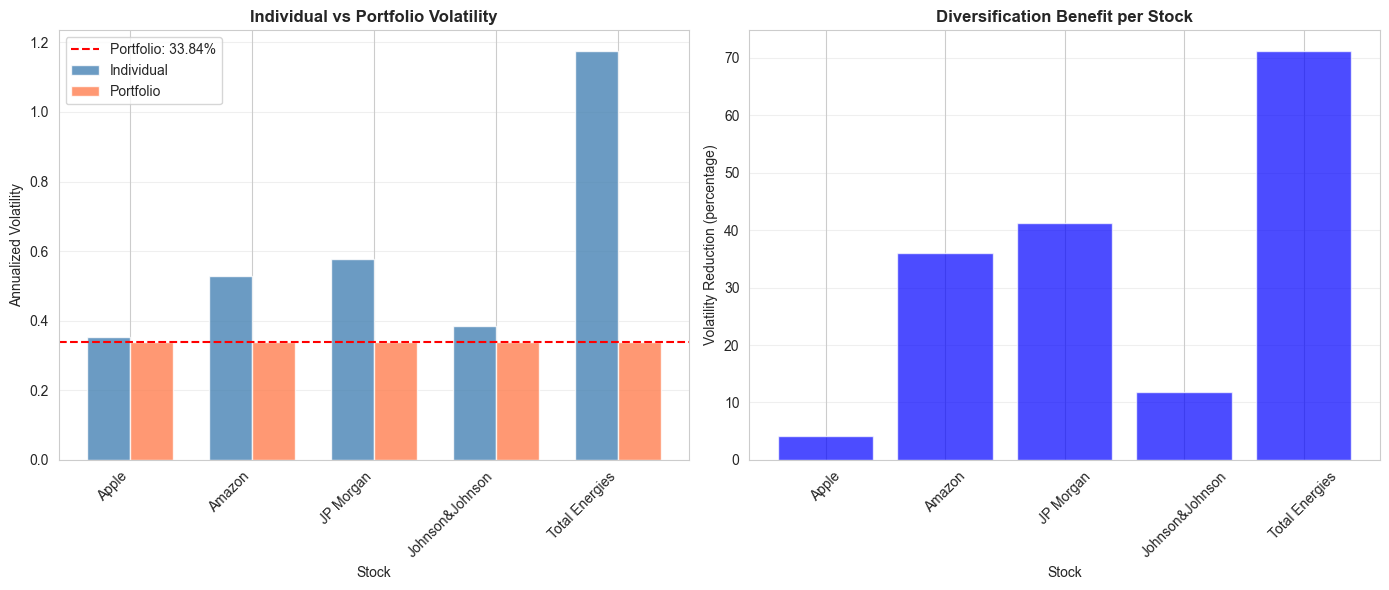

In [82]:
#compare individual vs portfolio volatility 

n_stocks = len(returns_df_aligned.columns)
equal_weight = 1.0 / n_stocks
weights = np.array([equal_weight] * n_stocks)

# calculate portfolio volatility
cov_matrix = returns_df_aligned.cov()
portfolio_var = np.dot(weights, np.dot(cov_matrix, weights))
portfolio_vol_annual = np.sqrt(portfolio_var) * np.sqrt(252)

# calculate individual volatilities
individual_vols = returns_df_aligned.std() * np.sqrt(252)
avg_individual_vol = individual_vols.mean()

# diversification metrics
diversification_benefit = avg_individual_vol -portfolio_vol_annual
diversification_ratio = portfolio_vol_annual/ avg_individual_vol

# portfolio return
portfolio_annual_return = returns_df_aligned.mean(axis=1).mean() * 252

# results summary
print(f"\nEQUAL-WEIGHT PORTFOLIO ANALYSIS")
print(f"Number of stocks: {n_stocks} | Weight per stock: {equal_weight:.2%}")
print(f"\nPortfolio Annualized Volatility: {portfolio_vol_annual:.2%}")
print(f"Average Individual Stock Volatility: {avg_individual_vol:.2%}")
print(f"Diversification Benefit: {diversification_benefit:.2%}")
print(f"Diversification Ratio: {diversification_ratio:.4f} (Ratio < 1 = less volatile)")
print(f"Portfolio Annualized Return: {portfolio_annual_return:.2%}")

# comparison table
comparison_df =pd.DataFrame({
    'Individual_Volatility':individual_vols,
    'Portfolio_Volatility':portfolio_vol_annual
})
comparison_df['Difference'] =comparison_df['Individual_Volatility'] -comparison_df['Portfolio_Volatility']
comparison_df['Reduction_Percent'] =(comparison_df['Difference'] /comparison_df['Individual_Volatility']) * 100

print("\n")
print("INDIVIDUAL vs PORTFOLIO VOLATILITY COMPARISON")
display(comparison_df.round(4))

# visualization
fig,axes = plt.subplots(1, 2,figsize=(14, 6))

# individual vs portfolio volatility
x =np.arange(len(comparison_df))
width =0.35
axes[0].bar(x -width/2, comparison_df['Individual_Volatility'], width, label='Individual', alpha=0.8, color='steelblue')
axes[0].bar(x + width/2, comparison_df['Portfolio_Volatility'], width, label='Portfolio', alpha=0.8, color='coral')
axes[0].axhline(y=portfolio_vol_annual, color='red', linestyle='--', label=f'Portfolio: {portfolio_vol_annual:.2%}')
axes[0].set_xlabel('Stock')
axes[0].set_ylabel('Annualized Volatility')
axes[0].set_title('Individual vs Portfolio Volatility', fontweight='bold')
axes[0].set_xticks( x)
axes[0].set_xticklabels(comparison_df.index , rotation=45, ha='right')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

#diversification benefit
axes[1].bar(comparison_df.index, comparison_df['Reduction_Percent'], color='blue', alpha=0.7)
axes[1].set_xlabel('Stock')
axes[1].set_ylabel('Volatility Reduction (percentage)')
axes[1].set_title('Diversification Benefit per Stock', fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].axhline(y=0, color='k', linestyle='-', linewidth=0.5)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


#### COVID Crisis Period Analysis

In order to better understand the importance of diversification, we need to properly grasp how the market reacts in times of economic crisis, so let's take the case study of the COVID crisis.

In [31]:
# define time periods
pre_covid_start = pd.Timestamp('2019-01-02', tz='UTC')
pre_covid_end = pd.Timestamp('2020-02-19', tz='UTC')  # before market crash
covid_crash_start = pd.Timestamp('2020-02-20', tz='UTC')
covid_crash_end = pd.Timestamp('2020-03-23', tz='UTC')  # market bottom
covid_recovery_start = pd.Timestamp('2020-03-24', tz='UTC')
covid_recovery_end = pd.Timestamp('2021-12-31', tz='UTC')
post_covid_start = pd.Timestamp('2022-01-01', tz='UTC')
post_covid_end = pd.Timestamp('2025-11-24', tz='UTC')

# function to calculate period statistics
def calculate_period_stats(df, start_date, end_date, period_name):
    period_data = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
    
    if len(period_data) == 0:
        return None
    
    returns = period_data['Log_Return'].dropna()
    
    stats = {
        'Period': period_name,
        'Days': len(period_data),
        'Avg_Daily_Return': returns.mean(),
        'Annualized_Return': returns.mean() * 252,
        'Daily_Volatility': returns.std(),
        'Annualized_Volatility': returns.std() * np.sqrt(252),
        'Max_Daily_Gain': returns.max(),
        'Max_Daily_Loss': returns.min(),
        'Sharpe_Ratio': (returns.mean() / returns.std()) * np.sqrt(252) if returns.std() > 0 else 0
    }
    
    # calculate max drawdown for period
    prices = period_data['Close'].values
    running_max = np.maximum.accumulate(prices)
    drawdown = (prices - running_max) / running_max
    stats['Max_Drawdown'] = drawdown.min()
    
    return stats

# analyze each company across periods
covid_analysis = {}
periods = [
    (pre_covid_start, pre_covid_end, 'Pre-COVID'),
    (covid_crash_start, covid_crash_end, 'COVID Crash'),
    (covid_recovery_start, covid_recovery_end, 'COVID Recovery'),
    (post_covid_start, post_covid_end, 'Post-COVID')
]

for name, df_returns in returns_data.items():
    company_periods = []
    for start, end, period_name in periods:
        stats = calculate_period_stats(df_returns, start, end, period_name)
        if stats:
            company_periods.append(stats)
    
    covid_analysis[name] = pd.DataFrame(company_periods)

# display results for each company
print("COVID period statistics by company")
for name, period_df in covid_analysis.items():
    print(f"\n{name} ({company_sectors[name]} Sector)")
    display(period_df.round(4))

COVID period statistics by company

Apple (Technology Sector)


,Period,Days,Avg_Daily_Return,Annualized_Return,Daily_Volatility,Annualized_Volatility,Max_Daily_Gain,Max_Daily_Loss,Sharpe_Ratio,Max_Drawdown
0,Pre-COVID,284,0.0025,0.6261,0.0162,0.2578,0.0661,-0.1049,2.4288,-0.1816
1,COVID Crash,22,-0.0157,-3.9495,0.0493,0.7833,0.0890,-0.1377,-5.0425,-0.2843
2,COVID Recovery,448,0.0026,0.6502,0.0198,0.3151,0.0996,-0.0697,2.0637,-0.2038
3,Post-COVID,977,0.0004,0.1095,0.0236,0.3754,0.3387,-0.3450,0.2917,-0.3645



Amazon (Consumer Sector)


,Period,Days,Avg_Daily_Return,Annualized_Return,Daily_Volatility,Annualized_Volatility,Max_Daily_Gain,Max_Daily_Loss,Sharpe_Ratio,Max_Drawdown
0,Pre-COVID,284,0.0012,0.3000,0.0139,0.2211,0.0489,-0.0553,1.3569,-0.1561
1,COVID Crash,22,-0.0074,-1.8529,0.0395,0.6278,0.0626,-0.0825,-2.9514,-0.2140
2,COVID Recovery,448,0.0013,0.3220,0.0362,0.5753,0.4682,-0.4757,0.5597,-0.4130
3,Post-COVID,977,0.0003,0.0723,0.0357,0.5668,0.3979,-0.4218,0.1276,-0.5168



JP Morgan (Finance Sector)


,Period,Days,Avg_Daily_Return,Annualized_Return,Daily_Volatility,Annualized_Volatility,Max_Daily_Gain,Max_Daily_Loss,Sharpe_Ratio,Max_Drawdown
0,Pre-COVID,284,0.0011,0.2776,0.0116,0.1836,0.0458,-0.0424,1.5118,-0.1030
1,COVID Crash,22,-0.0234,-5.8970,0.0730,1.1592,0.1656,-0.1621,-5.0872,-0.4024
2,COVID Recovery,448,0.0016,0.3914,0.0342,0.5428,0.2622,-0.4696,0.7211,-0.3896
3,Post-COVID,977,0.0006,0.1631,0.0405,0.6428,0.6221,-0.6279,0.2537,-0.5548



Johnson&Johnson (Healthcare Sector)


,Period,Days,Avg_Daily_Return,Annualized_Return,Daily_Volatility,Annualized_Volatility,Max_Daily_Gain,Max_Daily_Loss,Sharpe_Ratio,Max_Drawdown
0,Pre-COVID,284,0.0005,0.1379,0.0397,0.6304,0.4507,-0.4617,0.2187,-0.3811
1,COVID Crash,22,-0.0099,-2.4853,0.1341,2.1282,0.3515,-0.4732,-1.1678,-0.4044
2,COVID Recovery,448,0.0010,0.2467,0.0121,0.1928,0.0769,-0.0480,1.2794,-0.1312
3,Post-COVID,977,0.0002,0.0453,0.0109,0.1726,0.0601,-0.0790,0.2623,-0.2363



Total Energies (Energy Sector)


,Period,Days,Avg_Daily_Return,Annualized_Return,Daily_Volatility,Annualized_Volatility,Max_Daily_Gain,Max_Daily_Loss,Sharpe_Ratio,Max_Drawdown
0,Pre-COVID,284,-0.0003,-0.0725,0.0708,1.1245,0.5790,-0.9338,-0.0645,-0.6382
1,COVID Crash,22,-0.0297,-7.4776,0.0739,1.1729,0.0700,-0.1963,-6.3751,-0.4879
2,COVID Recovery,448,0.0012,0.3100,0.0998,1.5838,1.1143,-1.2242,0.1957,-0.7766
3,Post-COVID,977,0.0003,0.0691,0.0598,0.9492,1.0797,-1.0769,0.0728,-0.7014


To better understand the COVID crisis impact, it's best to visualize with graphs.

There are 4 relevant metrics:

* Annualized returns, so the average return earned by an investment (by each stock).
* Annualized volatility, so the statistical measure of the dispersion of these returns.
* Maximum drawdown so decrease of each stock
* Sharpe ratio, which shows whether a portfolio's excess returns are attributable to smart investment decisions or luck and risk.

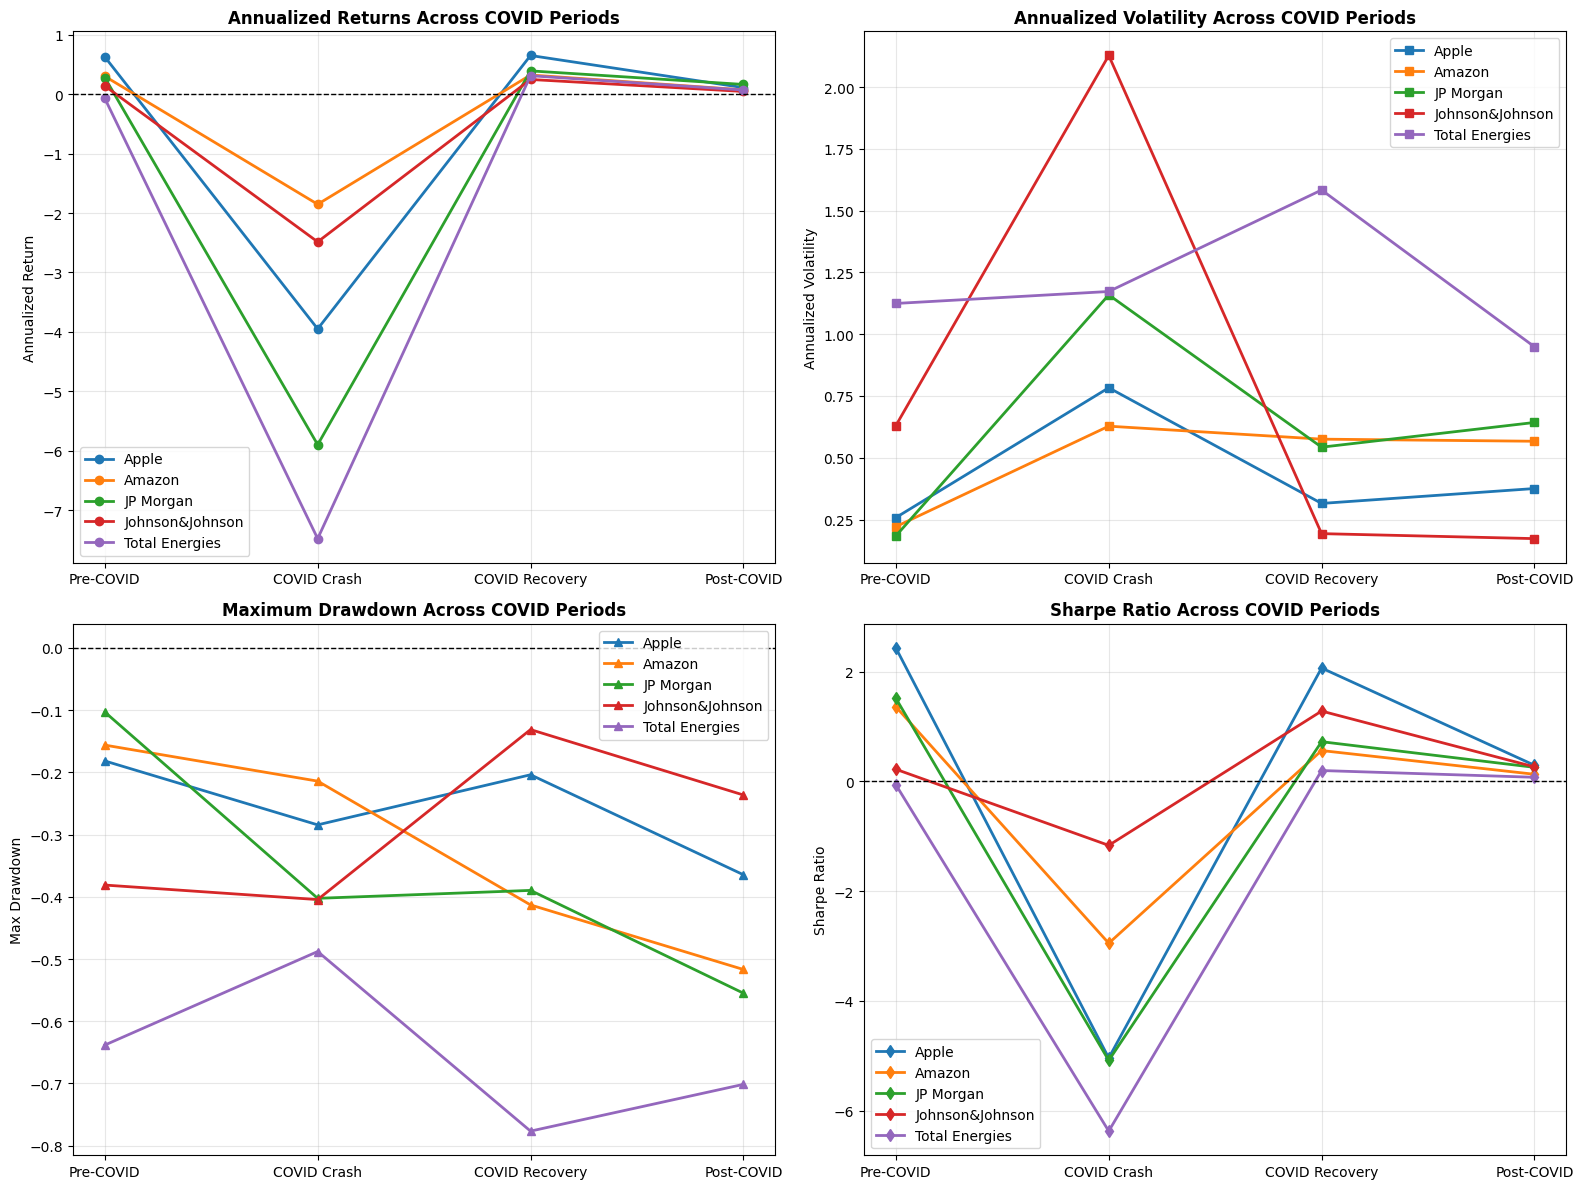

In [33]:

# Quick visualization: volatility across periods
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1: annualized returns by period
ax = axes[0, 0]
for name in covid_analysis.keys():
    period_data = covid_analysis[name]
    ax.plot(period_data['Period'], period_data['Annualized_Return'], 
            marker='o', label=name, linewidth=2)
ax.set_title('Annualized Returns Across COVID Periods', fontsize=12, fontweight='bold')
ax.set_ylabel('Annualized Return')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='k', linestyle='--', linewidth=1)

# 2: volatility by period
ax = axes[0, 1]
for name in covid_analysis.keys():
    period_data = covid_analysis[name]
    ax.plot(period_data['Period'], period_data['Annualized_Volatility'], 
            marker='s', label=name, linewidth=2)
ax.set_title('Annualized Volatility Across COVID Periods', fontsize=12, fontweight='bold')
ax.set_ylabel('Annualized Volatility')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)

# 3: max drawdown by period
ax = axes[1, 0]
for name in covid_analysis.keys():
    period_data = covid_analysis[name]
    ax.plot(period_data['Period'], period_data['Max_Drawdown'], 
            marker='^', label=name, linewidth=2)
ax.set_title('Maximum Drawdown Across COVID Periods', fontsize=12, fontweight='bold')
ax.set_ylabel('Max Drawdown')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='k', linestyle='--', linewidth=1)

# 4: sharpe ratio by period
ax = axes[1, 1]
for name in covid_analysis.keys():
    period_data = covid_analysis[name]
    ax.plot(period_data['Period'], period_data['Sharpe_Ratio'], 
            marker='d', label=name, linewidth=2)
ax.set_title('Sharpe Ratio Across COVID Periods', fontsize=12, fontweight='bold')
ax.set_ylabel('Sharpe Ratio')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='k', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()


### 4.3 Visualizations :

In [35]:
# set the style for all the plots
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

# define COVID period for shading
covid_start = pd.Timestamp('2020-02-20', tz='UTC')
covid_end = pd.Timestamp('2020-03-23', tz='UTC')



1. Stock Performance Comparison (Normalized)


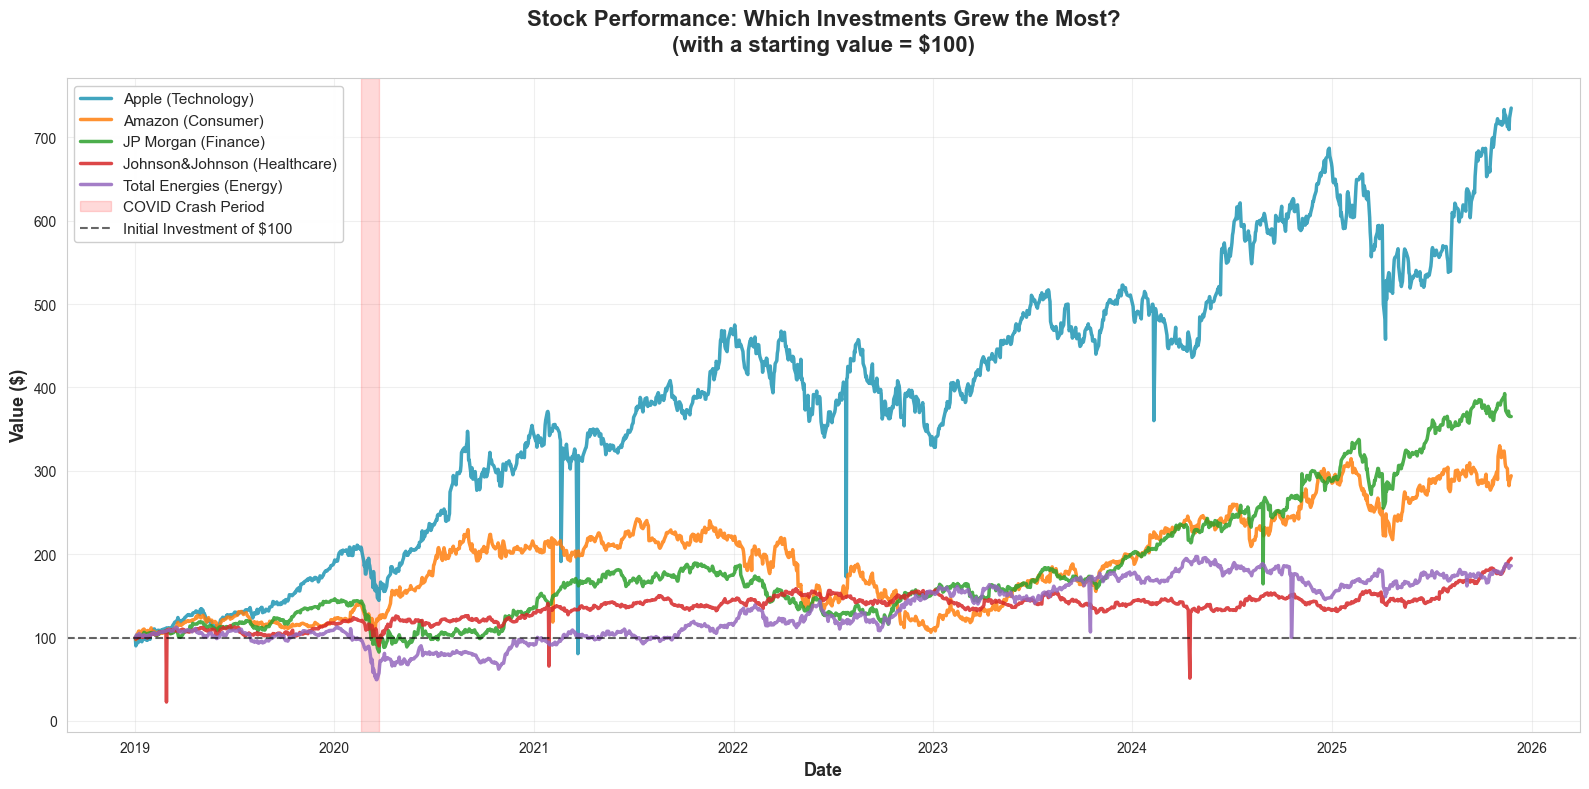

In [36]:
# first graph: normalized stock performance plot
print("\n1. Stock Performance Comparison (Normalized)")

fig, ax = plt.subplots(figsize=(16, 8))
sector_colors = {
    'Technology': "#1f96b4",
    'Consumer': '#ff7f0e', 
    'Finance': '#2ca02c',
    'Healthcare': '#d62728',
    'Energy': '#9467bd'
}

for name, df in cleaned_datasets.items():
    df_sorted = df.sort_values('Date').copy()
    normalized_price = (df_sorted['Adj Close'] / df_sorted['Adj Close'].iloc[0]) * 100
    sector = company_sectors[name]
    
    ax.plot(df_sorted['Date'], normalized_price, 
            label=f"{name} ({sector})", 
            linewidth=2.5, alpha=0.85,
            color=sector_colors[sector])

# COVID shading to see what happened during that period
ax.axvspan(covid_start, covid_end, alpha=0.15, color='red', 
           label='COVID Crash Period')

ax.set_title('Stock Performance: Which Investments Grew the Most?\n(with a starting value = $100)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Date', fontsize=13, fontweight='bold')
ax.set_ylabel('Value ($)', fontsize=13, fontweight='bold')
ax.axhline(y=100, color='black', linestyle='--', linewidth=1.5, alpha=0.6, 
           label='Initial Investment of $100')
ax.legend(loc='upper left', fontsize=11, framealpha=0.95)
ax.grid(True, alpha=0.3)

# add annotations for key insights
final_values = {}
for name, df in cleaned_datasets.items():
    df_sorted = df.sort_values('Date').copy()
    final_value = (df_sorted['Adj Close'].iloc[-1] / df_sorted['Adj Close'].iloc[0]) * 100
    final_values[name] = final_value

best_stock = max(final_values, key=final_values.get)
worst_stock = min(final_values, key=final_values.get)

plt.tight_layout()
plt.show()

# print (f"\nBest Performer: {best_stock} with final value of ${final_values[best_stock]:.2f},\n"f"Worst Performer: {worst_stock} with final value of ${final_values[worst_stock]:.2f}")




2. Risk-Return Analysis: Finding the Best Investment


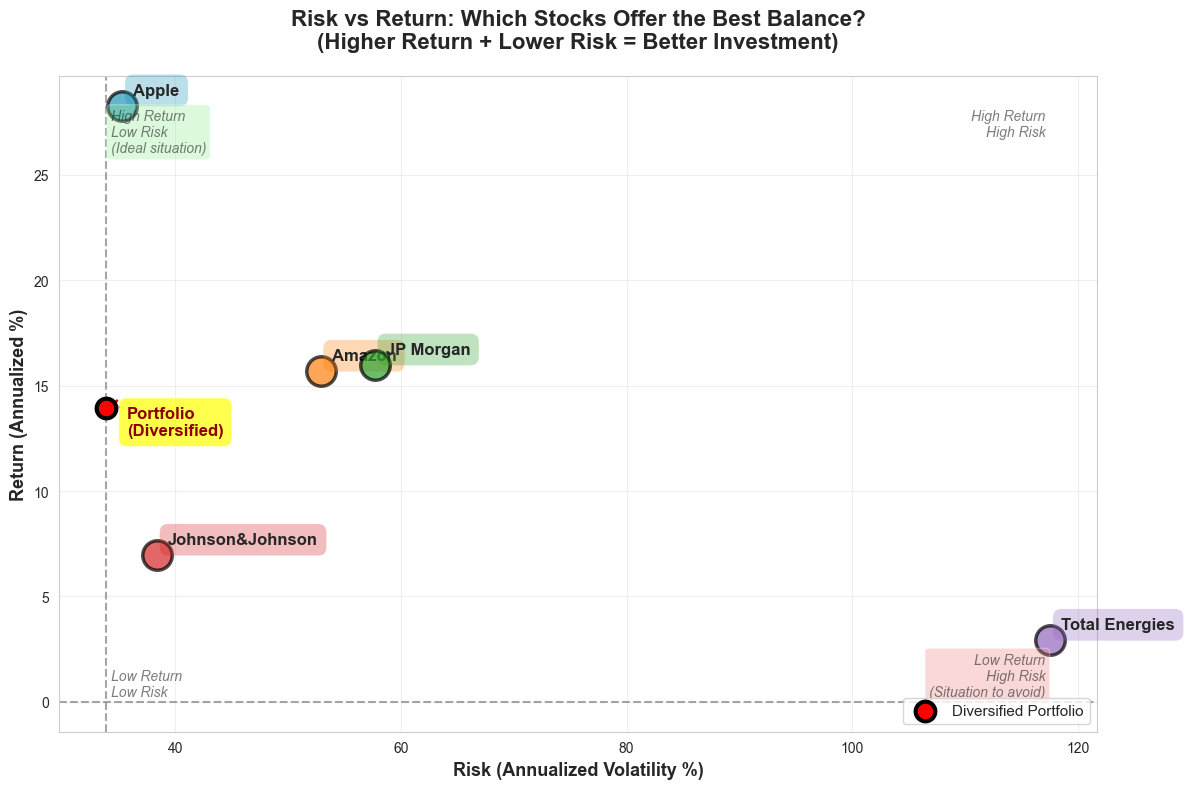

In [110]:
print("\n2. Risk-Return Analysis: Finding the Best Investment")

fig, ax = plt.subplots(figsize=(12, 8))

# we want to plot each stock
for name in risk_df.index:
    sector = risk_df.loc[name, 'Sector']
    # convert to percentage
    x = risk_df.loc[name, 'Annualized_volatility'] * 100  
    y = risk_df.loc[name, 'Annualized_return'] * 100      
    
    ax.scatter(x, y, s=450, c=sector_colors[sector], alpha=0.7, 
          edgecolors='black', linewidth=2.5, zorder=3)
    
    # better annotation positioning (not really necessary but it's just better for the visualisation)
    ax.annotate(name, (x, y), fontsize=12, fontweight='bold',
               xytext=(8, 8), textcoords='offset points',
               bbox=dict(boxstyle='round,pad=0.5', facecolor=sector_colors[sector], 
                        alpha=0.3, edgecolor='none'))

# add portfolio point
port_x = portfolio_vol_annual * 100
port_y = portfolio_annual_return * 100
ax.scatter(port_x, port_y, s=800, c='red', marker='.', 
          edgecolors='black', linewidth=3, zorder=5, label='Diversified Portfolio')
ax.annotate('Portfolio\n(Diversified)', (port_x, port_y), 
           fontsize=12, fontweight='bold', color='darkred',
           xytext=(15, -20), textcoords='offset points',
           bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
           arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3', 
                          lw=2, color='red'))

# add quadrant lines, label them
ax.axhline(y=0, color='gray', linestyle='--', linewidth=1.5, alpha=0.7)
ax.axvline(x=port_x, color='gray', linestyle='--', linewidth=1.5, alpha=0.7)

ax.text(0.95, 0.95, 'High Return\nHigh Risk', transform=ax.transAxes,
       fontsize=10, ha='right', va='top', style='italic', alpha=0.6)
ax.text(0.05, 0.95, 'High Return\nLow Risk\n(Ideal situation)', transform=ax.transAxes,
       fontsize=10, ha='left', va='top', style='italic', alpha=0.6,
       bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.3))
ax.text(0.05, 0.05, 'Low Return\nLow Risk', transform=ax.transAxes,
       fontsize=10, ha='left', va='bottom', style='italic', alpha=0.6)
ax.text(0.95, 0.05, 'Low Return\nHigh Risk\n(Situation to avoid)', transform=ax.transAxes,
       fontsize=10, ha='right', va='bottom', style='italic', alpha=0.6,
       bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.3))

ax.set_xlabel('Risk (Annualized Volatility %)', fontsize=13, fontweight='bold')
ax.set_ylabel('Return (Annualized %)', fontsize=13, fontweight='bold')
ax.set_title('Risk vs Return: Which Stocks Offer the Best Balance?\n(Higher Return + Lower Risk = Better Investment)', # include the description in the title for clarity
            fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3)
ax.legend(loc='lower right', fontsize=11)

plt.tight_layout()
plt.show()



3. How Risk Changed Over Time


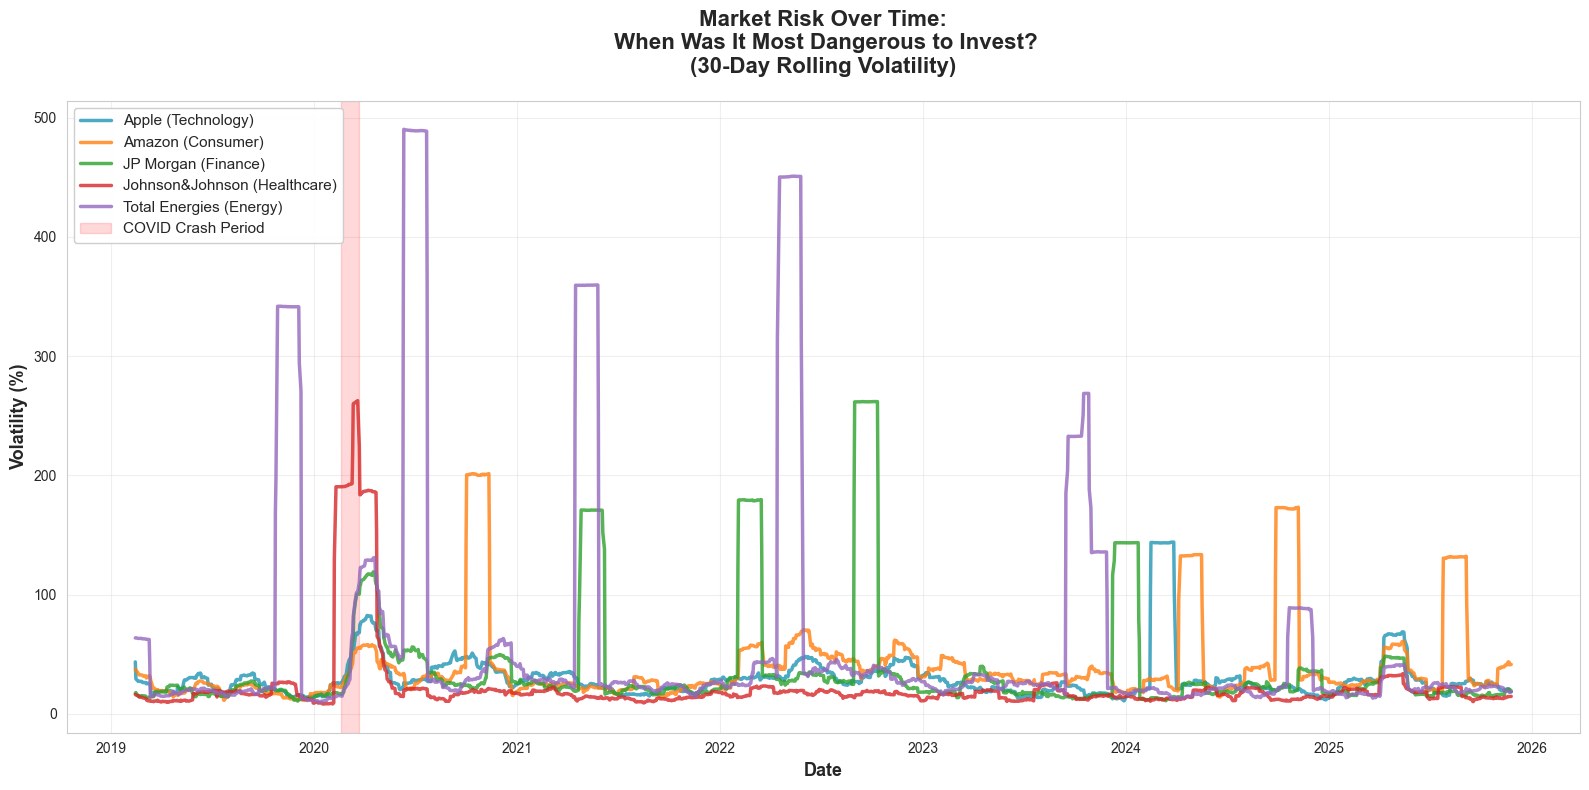

In [ ]:
print("\n3. How Risk Changed Over Time") # rolling volatility (over 30 days)

fig, ax = plt.subplots(figsize=(16, 8))

for name, df in returns_data.items():
    df_sorted = df.sort_values('Date').copy()
    rolling_vol = df_sorted['Log_Return'].rolling(window=30).std() * np.sqrt(252) * 100
    sector = company_sectors[name]
    
    ax.plot(df_sorted['Date'], rolling_vol, 
           label=f"{name} ({sector})", 
           linewidth=2.5, alpha=0.8,
           color=sector_colors[sector])

# COVID shading
ax.axvspan(covid_start, covid_end, alpha=0.15, color='red', 
           label='COVID Crash Period')

ax.set_title('Market Risk Over Time:\n When Was It Most Dangerous to Invest?\n(30-Day Rolling Volatility)', 
            fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Date', fontsize=13, fontweight='bold')
ax.set_ylabel('Volatility (%)', fontsize=13, fontweight='bold')
ax.legend(loc='upper left', fontsize=11, framealpha=0.95)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



4. Sector Comparison Dashboard


C:\Users\apoll\AppData\Local\Temp\ipykernel_55716\3602223691.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


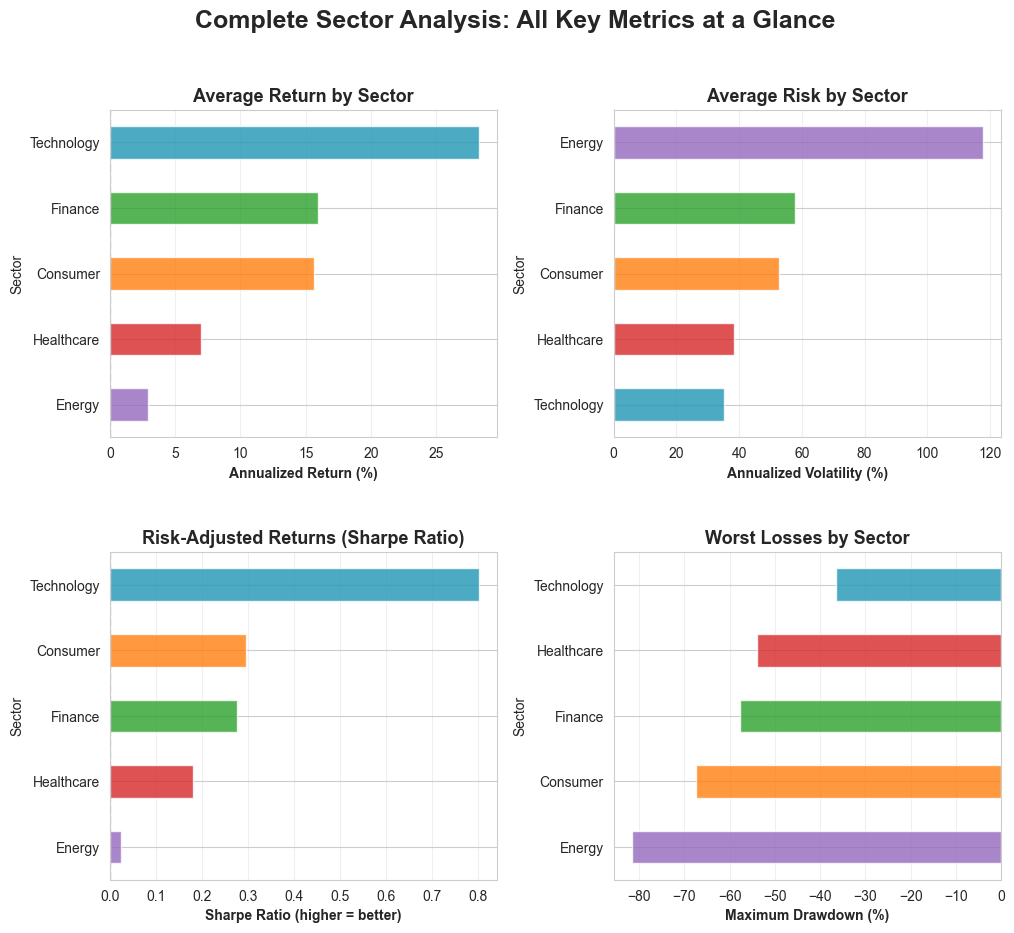

In [104]:
print("\n4. Sector Comparison Dashboard")

fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 3, hspace=0.35, wspace=0.3)

# calculate Sharpe ratio
risk_df['Sharpe'] = risk_df['Annualized_return'] / risk_df['Annualized_volatility']

# 5a. Returns by sector
ax1 = fig.add_subplot(gs[0, 0])
sector_returns = risk_df.groupby('Sector')['Annualized_return'].mean().sort_values() * 100
bars = sector_returns.plot(kind='barh', ax=ax1, alpha=0.8)
# color
for i, (sector, value) in enumerate(sector_returns.items()):
    bars.patches[i].set_facecolor(sector_colors[sector])
ax1.set_title('Average Return by Sector', fontweight='bold', fontsize=13)
ax1.set_xlabel('Annualized Return (%)', fontweight='bold')
ax1.axvline(x=0, color='black', linestyle='--', linewidth=1.5)
ax1.grid(True, alpha=0.3, axis='x')

# 5b. volatility by sector
ax2 = fig.add_subplot(gs[0, 1])
sector_vol = risk_df.groupby('Sector')['Annualized_volatility'].mean().sort_values() * 100
bars = sector_vol.plot(kind='barh', ax=ax2, alpha=0.8)
for i, (sector, value) in enumerate(sector_vol.items()):
    bars.patches[i].set_facecolor(sector_colors[sector])
ax2.set_title('Average Risk by Sector', fontweight='bold', fontsize=13)
ax2.set_xlabel('Annualized Volatility (%)', fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')

# 5c. Sharpe ratio by sector
ax3 = fig.add_subplot(gs[1, 0])
sector_sharpe = risk_df.groupby('Sector')['Sharpe'].mean().sort_values()
bars = sector_sharpe.plot(kind='barh', ax=ax3, alpha=0.8)
for i, (sector, value) in enumerate(sector_sharpe.items()):
    bars.patches[i].set_facecolor(sector_colors[sector])
ax3.set_title('Risk-Adjusted Returns (Sharpe Ratio)', fontweight='bold', fontsize=13)
ax3.set_xlabel('Sharpe Ratio (higher = better)', fontweight='bold')
ax3.axvline(x=0, color='black', linestyle='--', linewidth=1.5)
ax3.grid(True, alpha=0.3, axis='x')

# 5d. max drawdown by sector
ax4 = fig.add_subplot(gs[1, 1])
sector_dd = risk_df.groupby('Sector')['Max_drawdown'].mean().sort_values() * 100
bars = sector_dd.plot(kind='barh', ax=ax4, alpha=0.8)
for i, (sector, value) in enumerate(sector_dd.items()):
    bars.patches[i].set_facecolor(sector_colors[sector])
ax4.set_title('Worst Losses by Sector', fontweight='bold', fontsize=13)
ax4.set_xlabel('Maximum Drawdown (%)', fontweight='bold')
ax4.grid(True, alpha=0.3, axis='x')

plt.suptitle('Complete Sector Analysis: All Key Metrics at a Glance', 
             fontsize=18, fontweight='bold', x=0.35)
plt.tight_layout()
plt.show()


## 5. Communicate

#### A few summary insights.

#### 1. Covid summary insights

In [89]:

# key findings
print("Summary findings")

# these are aggregate statistics across all companies to assemble the summary findings.
aggregate_stats = []
for period_start, period_end, period_name in periods:
    period_returns = []
    period_vols = []
    period_drawdowns = []
    
    for name, df_returns in returns_data.items():
        stats = calculate_period_stats(df_returns, period_start, period_end, period_name)
        if stats:
            period_returns.append(stats['Annualized_Return'])
            period_vols.append(stats['Annualized_Volatility'])
            period_drawdowns.append(stats['Max_Drawdown'])
    
    aggregate_stats.append({
        'Period': period_name,
        'Avg_Return': np.mean(period_returns),
        'Avg_Volatility': np.mean(period_vols),
        'Avg_Max_Drawdown': np.mean(period_drawdowns),
        'Most_Volatile': max(period_vols),
        'Least_Volatile': min(period_vols)
    })

aggregate_df = pd.DataFrame(aggregate_stats)

# identify most/least impacted during crash
crash_data = []
for name in covid_analysis.keys():
    crash_period = covid_analysis[name][covid_analysis[name]['Period'] == 'COVID Crash']
    if not crash_period.empty:
        crash_data.append({
            'Company': name,
            'Sector': company_sectors[name],
            'Crash_Return': crash_period['Annualized_Return'].values[0],
            'Crash_Volatility': crash_period['Annualized_Volatility'].values[0],
            'Crash_Drawdown': crash_period['Max_Drawdown'].values[0]
        })

crash_df = pd.DataFrame(crash_data)
most_impacted = crash_df.nsmallest(1, 'Crash_Return').iloc[0]
least_impacted = crash_df.nlargest(1, 'Crash_Return').iloc[0]

print(f"\n• Most impacted during crash: {most_impacted['Company']} ({most_impacted['Sector']})")
print(f"  - Annualized return: {most_impacted['Crash_Return']:.2%}")
print(f"  - Max drawdown: {most_impacted['Crash_Drawdown']:.2%}")

print(f"\n• Least impacted during crash: {least_impacted['Company']} ({least_impacted['Sector']})")
print(f"  - Annualized return: {least_impacted['Crash_Return']:.2%}")
print(f"  - Max drawdown: {least_impacted['Crash_Drawdown']:.2%}")

print(f"\n• Average volatility increase during crash: {(aggregate_df[aggregate_df['Period']=='COVID Crash']['Avg_Volatility'].values[0] / aggregate_df[aggregate_df['Period']=='Pre-COVID']['Avg_Volatility'].values[0] - 1) * 100:.2f}%")

Summary findings

• Most impacted during crash: Total Energies (Energy)
  - Annualized return: -747.76%
  - Max drawdown: -48.79%

• Least impacted during crash: Amazon (Consumer)
  - Annualized return: -185.29%
  - Max drawdown: -21.40%

• Average volatility increase during crash: 142.88%


#### 2. Overall summary insights

In [88]:
# print summary insights from what we learned from the visualizations
print(f"Best preformer: {best_stock} grew to ${final_values[best_stock]:.0f} from $100")
print(f"Worst performer: {worst_stock} grew to ${final_values[worst_stock]:.0f} from $100")

riskiest = risk_df.nlargest(1, 'Annualized_volatility').index[0]
safest = risk_df.nsmallest(1, 'Annualized_volatility').index[0]
print(f"\nRiskiest stock: {riskiest} ({risk_df.loc[riskiest, 'Annualized_volatility']*100:.1f}% volatility)")
print(f"Safest stock: {safest} ({risk_df.loc[safest, 'Annualized_volatility']*100:.1f}% volatility)")

most_corr = correlation_matrix.columns[0]
least_corr_stock = corr_df.iloc[0]['Stock']
print(f"\nMost correlated: Apple & Amazon tend to move together")
print(f"Best for diversification: {least_corr_stock} (because it is the most independent)")

print(f"\nPortolio benefits:\nDiversification reduced risk by {(1-diversification_ratio)*100:.1f}%")
print(f"Individual avg volatility: {avg_individual_vol*100:.1f}%")
print(f"Portfolio volatility: {portfolio_vol_annual*100:.1f}%")

Best preformer: Apple grew to $735 from $100
Worst performer: Total Energies grew to $186 from $100

Riskiest stock: Total Energies (117.6% volatility)
Safest stock: Apple (35.3% volatility)

Most correlated: Apple & Amazon tend to move together
Best for diversification: Total Energies (because it is the most independent)

Portolio benefits:
Diversification reduced risk by 43.9%
Individual avg volatility: 60.3%
Portfolio volatility: 33.8%
